# FLOW MAP
## How to map great circle routes 

### Data
We came across the `OpenFlights Database **https://openflights.org/data.html**` that has information on all the airports, airlines, and flight routes of the world. It is easy enough to download this information as text files (.dat files)


####  Get the data ready
For use in Python, the table should have the following columns: origin latitude, origin longitude, destination latitude, destination longitude, route name. The exact names are not important, but the columns need to be in this particular order if you don’t want to make any adjustments to the script. Each line below that should have the details for one route.

In our case, we first had to join the table with the flight routes with information on the airports, in order to get the longitude and latitude from the latter. (We actually added it twice – so as to get the coordinates for both the origin and the destination airports.)

### Install and Import relevant packages i.e pandas, geographiclib, and lxml.

In [8]:
import pandas as pd


In [9]:
#read data
df = pd.read_excel(r'C:\Users\PC\Music\Flight_plan\data\final_data.xlsx')
df.head()

,Trip_Id,Type_of_trip,Leg_Id,Date,Aiport_Codes,origin_lat,origin long,Airport_Name,City,country,Aiport_Codes.1,destination_lat,destination_long,Airport_Name.1,City.1,country.1,Notes
0,1,personal,1,2013-11-21 00:00:00,2050,34.565899,69.212303,Hamid Karzai International Airport,Kabul,Afghanistan,2188,25.252800,55.364399,Dubai International Airport,Dubai,United Arab Emirates (UAE),"(Safi, Qatar, Batik Air, MAF, foot, motorcylce..."
1,1,personal,2,2013-11-21 00:00:00,2188,25.252800,55.364399,Dubai International Airport,Dubai,United Arab Emirates (UAE),2241,25.261101,51.565102,Doha International Airport,Doha,Qatar,NaN
2,1,personal,3,2013-11-22 00:00:00,2241,25.261101,51.565102,Doha International Airport,Doha,Qatar,3275,-6.125570,106.655998,Soekarno-Hatta International Airport,Jakarta,Indonesia,NaN
3,1,personal,4,2013-11-22 00:00:00,3275,-6.125570,106.655998,Soekarno-Hatta International Airport,Jakarta,Indonesia,3244,-2.576950,140.516006,Sentani International Airport,Sentani,"Papua, Indonesia",NaN
4,1,personal,5,2013-11-26 00:00:00,3244,-2.576950,140.516006,Sentani International Airport,Sentani,"Papua, Indonesia",3245,-4.102510,138.957001,Wamena Airport,Wamena,"Papua, Indonesia",NaN


In [10]:
url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat'

airports = pd.read_csv(url, delimiter=',', names=['id', 'name', 'city', 'country', 'iata',
                                                                   'icao', 'lat', 'long', 'altitude', 'timezone',
                                                                   'dst', 'tz', 'type', 'source'])

print(airports[airports['country']=='Kenya'])

        id                                  name                    city  \
1110  1138         Eldoret International Airport                 Eldoret   
1111  1139                      Kakamega Airport                Kakamega   
1112  1140                        Kisumu Airport                  Kisumu   
1113  1141                        Kitale Airport                  Kitale   
1114  1143                        Lodwar Airport                  Lodwar   
1115  1144                        Manda Airstrip                    Lamu   
1116  1145     Mombasa Moi International Airport                 Mombasa   
1117  1146                      Naivasha Airport                Naivasha   
1118  1147                Nairobi Wilson Airport                 Nairobi   
1119  1148                          Moi Air Base                 Nairobi   
1120  1149                         Wajir Airport                   Wajir   
3840  4059   Jomo Kenyatta International Airport                 Nairobi   
4386  5692  

In [11]:
# saving the DataFrame as a CSV file
#airports.to_csv(r"C:\Users\PC\Music\Flight_plan\data\airports_data.csv") 

In [12]:
airports.head()

,id,name,city,country,iata,icao,lat,long,altitude,timezone,dst,tz,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


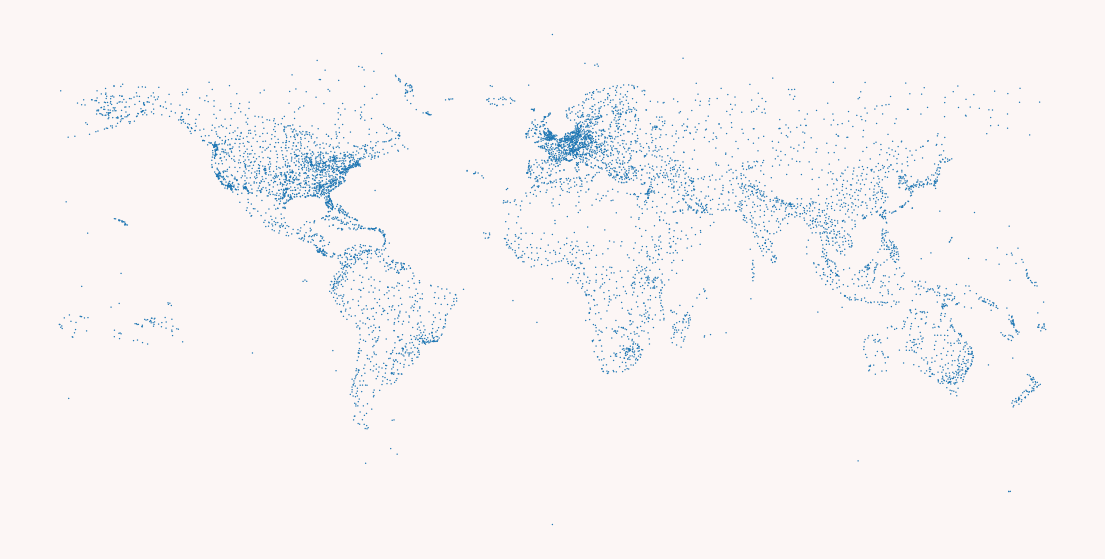

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)

ax.scatter(airports['long'], airports['lat'], s=1, alpha=1, edgecolors='none')
ax.axis('off')

plt.show()

In [14]:
url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat'

routes = pd.read_csv(url, delimiter=',', names=['airline', 'id', 'source_airport', 'source_airport_id',
                                                               'destination_airport', 'destination_airport_id', 'codeshare',
                                                               'stops', 'equitment'])

routes.head()

,airline,id,source_airport,source_airport_id,destination_airport,destination_airport_id,codeshare,stops,equitment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [17]:
airports.head(2)

,id,name,city,country,iata,icao,lat,long,altitude,timezone,dst,tz,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports


In [18]:
df.head(2)

,Trip_Id,Type_of_trip,Leg_Id,Date,Aiport_Codes,origin_lat,origin long,Airport_Name,City,country,Aiport_Codes.1,destination_lat,destination_long,Airport_Name.1,City.1,country.1,Notes
0,1,personal,1,2013-11-21 00:00:00,2050,34.565899,69.212303,Hamid Karzai International Airport,Kabul,Afghanistan,2188,25.252800,55.364399,Dubai International Airport,Dubai,United Arab Emirates (UAE),"(Safi, Qatar, Batik Air, MAF, foot, motorcylce..."
1,1,personal,2,2013-11-21 00:00:00,2188,25.252800,55.364399,Dubai International Airport,Dubai,United Arab Emirates (UAE),2241,25.261101,51.565102,Doha International Airport,Doha,Qatar,NaN


In [20]:
import geopandas as gpd
from shapely.geometry import LineString

geometry = [LineString([[df.iloc[i]['origin long'], df.iloc[i]['origin_lat']], [df.iloc[i]['destination_long'], df.iloc[i]['destination_lat']]]) for i in range(df.shape[0])]
routes = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
routes.head()

,Trip_Id,Type_of_trip,Leg_Id,Date,Aiport_Codes,origin_lat,origin long,Airport_Name,City,country,Aiport_Codes.1,destination_lat,destination_long,Airport_Name.1,City.1,country.1,Notes,geometry
0,1,personal,1,2013-11-21 00:00:00,2050,34.565899,69.212303,Hamid Karzai International Airport,Kabul,Afghanistan,2188,25.252800,55.364399,Dubai International Airport,Dubai,United Arab Emirates (UAE),"(Safi, Qatar, Batik Air, MAF, foot, motorcylce...","LINESTRING (69.21230 34.56590, 55.36440 25.25280)"
1,1,personal,2,2013-11-21 00:00:00,2188,25.252800,55.364399,Dubai International Airport,Dubai,United Arab Emirates (UAE),2241,25.261101,51.565102,Doha International Airport,Doha,Qatar,NaN,"LINESTRING (55.36440 25.25280, 51.56510 25.26110)"
2,1,personal,3,2013-11-22 00:00:00,2241,25.261101,51.565102,Doha International Airport,Doha,Qatar,3275,-6.125570,106.655998,Soekarno-Hatta International Airport,Jakarta,Indonesia,NaN,"LINESTRING (51.56510 25.26110, 106.65600 -6.12..."
3,1,personal,4,2013-11-22 00:00:00,3275,-6.125570,106.655998,Soekarno-Hatta International Airport,Jakarta,Indonesia,3244,-2.576950,140.516006,Sentani International Airport,Sentani,"Papua, Indonesia",NaN,"LINESTRING (106.65600 -6.12557, 140.51601 -2.5..."
4,1,personal,5,2013-11-26 00:00:00,3244,-2.576950,140.516006,Sentani International Airport,Sentani,"Papua, Indonesia",3245,-4.102510,138.957001,Wamena Airport,Wamena,"Papua, Indonesia",NaN,"LINESTRING (140.51601 -2.57695, 138.95700 -4.1..."


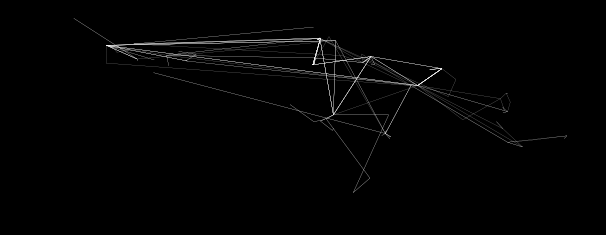

In [21]:
fig = plt.figure(facecolor='black')
ax = plt.axes()

fig.set_size_inches(7, 3.5)
ax.patch.set_facecolor('black')

routes.plot(ax=ax, color='white', linewidth=0.1)

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')

plt.show()